# Problem Set 3


---

This assignment will introduce you to:
1. Train a CNN model.
2. Save/restore and fine-tune with model weights.
3. Tensorboard toolkit (optional).
4. DeepDream algorithm.

This code has been tested on Colab.


---

## Preamble

To run and solve this assignment, you need an interface to edit and run ipython notebooks (`.ipynb` files). The easiest way to complete this assignment is to use Google Colab. You can just copy the assignment notebook to your google drive and open it, edit it and run it on Google Colab. All libraries you need are pre-installed on Colab.

---

### Local installation
The alternative is to have a local installation, although we do not recommend it. If you are working on Google Colab, feel free to skip to the next section "More instructions". We recommend using virtual environments for all your installations. Following is one way to set up a working environment on your local machine for this assignment, using [Anaconda](https://www.anaconda.com/distribution/):

- Download and install Anaconda following the instructions [here](https://docs.anaconda.com/anaconda/install/)
- Create a conda environment using `conda create --name dl_env python=3` (You can change the name of the environment instead of calling it `dl_env`)
- Now activate the environment using : `conda activate dl_env`
- Install jupyter lab, which is the [jupyter project's](https://jupyter.org/index.html) latest notebook interface : `pip install jupyterlab`. You can also use the classic jupyter notebooks and there isn't any difference except the interface.
- Install other necessary libraries. For this assignment you need `numpy`, `scipy` , [`pytorch`](https://pytorch.org/get-started/locally/) and `matplotlib`, all of which can be installed using : `pip install <lib_name>`. Doing this in the environment, would install these libraries for `dl_env`. You can also use `conda install`.
- Now download the assignment notebook in a local directory and launching `jupyter lab` in the same directory should open a jupyter lab session in your default browser, where you can open and edit the ipython notebook.
- For deactivating the environment when you are done with it, use : `conda deactivate`.

For users running a Jupyter server on a remote machine :
- Launch Jupyter lab on the remote server (in the directory with the homework ipynb file) using : `jupyter lab --no-browser --ip=0.0.0.0`
- To access the jupyter lab interface on your local browser, you need to set up ssh port forwarding. This can be done by running : `ssh -N -f -L localhost:8888:localhost:8888 <remoteuser>@<remotehost>`. You can now open `localhost:8888` on your local browser to access jupyter lab. This assumes you are running jupyter lab on its default port 8888 on the server.
- Check "Making life easy" section at the end of [this post](https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/) to find how to add functions to your bash run config to do this more easily each time. The post mentions functions for jupyter notebook, but just replace those with jupyter lab if you are using that interface.

---

### More instructions

In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

To enter your solutions for the written questions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. We will not accept handwritten solutions.

Put your solutions into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. (Double) click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission: please upload your completed **solution .ipynb file and printed PDF file** to [Gradescope](https://www.gradescope.com/courses/591156) (Entry code: GP5DK6) by **Oct 23, 10PM EST**.

Note: `Vector` stands for `column vector` below.

---


# Problem 1: Convolutional Networks (50 points)

In this part, we will experiment with CNNs in PyTorch. You will need to read the documentation of the functions provided below to understand how they work.

**GPU Training.** Smaller networks will train fine on a CPU, but you may want to use GPU training for this part of the homework. You can run your experiments on Colab's GPUs or on BU's  [Shared Computing Cluster (SCC)](http://www.bu.edu/tech/services/research/computation/scc/). You may find this SCC tutorial helpful: [SCC tutorial](http://rcs.bu.edu/classes/CS542/SC542.html). To get access to a GPU on Colab, go to `Edit->Notebook Settings` in the notebook and set the hardware accelerator to "GPU".

In [2]:
# check GPU status
!nvidia-smi

zsh:1: command not found: nvidia-smi


### 1.1 Training a CNN on ASL numbers


The American Sign Language(ASL) Numbers [Dataset](https://www.kaggle.com/datasets/lexset/synthetic-asl-numbers) is a synthetic image dataset of numbers 1 through 10 in American Sign Language. Below are example images of how numbers represented in ASL.

![ASL numbers](https://www.dummies.com/wp-content/uploads/321611.image0.jpg)

In this homework, we will create and train a convolutional network (CNN) on the dataset to classify the ASL numbers.

In [3]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

### 1.1.0 Data Download
The data is in the shared google drive https://drive.google.com/drive/folders/1a6MOx0QC1CyB3TEYOVp9kEvlMpSVGgRU?usp=share_link. This dataset is around 3GB.  To avoid spending time download and upload it to Colab, you can click the link above and then right click on the `HW3-23` folder, select **Add a shortcut to Drive** to save a SHORTCUT in your Google Drive. Then you should be able to see a `HW3-23/synthetic_data` folder in your google drive.

You should be able to find the data at `/content/drive/MyDrive/HW3-23/synthetic_data` after running this cell


In [5]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Check if the path is correct.

In [6]:
# run this cell to check if the output is the same as the next cell
# !ls /content/drive/MyDrive/HW3-23/synthetic_data

In [11]:
# no need to run this cell
!ls synthetic_data

Test_Nums   Train_Nums  numbers.jpg pumpkin.jpg


In [14]:
PATH_OF_DATA='synthetic_data/'

 Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as batch size of 4 for the `torch.utils.data.DataLoader`, etc. Note that in this part we don't use data normalization.

In [16]:
# Comment 0: define transformation that you wish to apply on image
data_transforms_no_norm = transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset_no_norm = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms_no_norm)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler_no_norm = torch.utils.data.RandomSampler(trainset_no_norm)
trainloader_no_norm = torch.utils.data.DataLoader(trainset_no_norm, batch_size=4, sampler = train_sampler_no_norm, shuffle=False, num_workers=2)

testset_no_norm = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms_no_norm)
testloader_no_norm = torch.utils.data.DataLoader(testset_no_norm, batch_size=4, shuffle=False, num_workers=2)

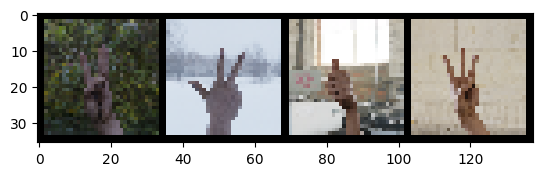

6     3     10    6    


In [18]:
# show some examples
import matplotlib.pyplot as plt
import numpy as np


classes = ('1','10', '2', '3', '4', '5', '6', '7', '8', '9',)
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader_no_norm)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### 1.1.1 CNN Model
Next, we will train a CNN on the data. We have defined a simple CNN for you with two convolutional layers and two fully-connected layers below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.005$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

In [22]:
import torch.optim as optim

# Define the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Set the learning rate and momentum for the SGD optimizer
learning_rate = 0.005
momentum = 0.9

# Instantiate the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

# Check if a GPU is available and move the model and criterion to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
criterion.to(device)

CrossEntropyLoss()

### 1.1.2 Training
Write the training loop that makes three full passes through the dataset (5 epochs) using SGD. Your batch size should be 4.

Using a T4 GPU on colab, it will take around 25 min to train. So go slack off for a while...

![reddit xkcd comic](https://i.redd.it/5cjdqxcg07k11.png)

In [23]:
def train_on_ASL(net, optimizer, device, trainloader):
  if torch.cuda.is_available():
      net.cuda()
  net.train()
  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # Zero the parameter gradients
          optimizer.zero_grad()
          
          # Forward pass
          outputs = net(inputs)
          
          # Compute the loss
          loss = criterion(outputs, labels)
          
          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 200 == 199:    # print every 200 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 200))
              running_loss = 0.0

  print('Finished Training')
  return net

In [24]:
# kick off the training
net = train_on_ASL(net, optimizer, device, trainloader_no_norm)

[1,   200] loss: 2.280
[1,   400] loss: 2.261
[1,   600] loss: 2.266
[1,   800] loss: 2.260
[1,  1000] loss: 2.247
[1,  1200] loss: 2.254
[1,  1400] loss: 2.256
[1,  1600] loss: 2.248


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.216
[2,   400] loss: 2.152
[2,   600] loss: 2.082
[2,   800] loss: 1.992
[2,  1000] loss: 1.940
[2,  1200] loss: 1.905
[2,  1400] loss: 1.788
[2,  1600] loss: 1.779


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 1.655
[3,   400] loss: 1.578
[3,   600] loss: 1.556
[3,   800] loss: 1.411
[3,  1000] loss: 1.361
[3,  1200] loss: 1.344
[3,  1400] loss: 1.239
[3,  1600] loss: 1.437


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.059
[4,   400] loss: 1.060
[4,   600] loss: 1.000
[4,   800] loss: 1.001
[4,  1000] loss: 0.828
[4,  1200] loss: 1.039
[4,  1400] loss: 0.994
[4,  1600] loss: 0.873


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.678
[5,   400] loss: 0.747
[5,   600] loss: 0.667
[5,   800] loss: 0.756
[5,  1000] loss: 0.639
[5,  1200] loss: 0.719
[5,  1400] loss: 0.686
[5,  1600] loss: 0.620


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


### 1.1.3 Test Accuracy
Load the test data (don't forget to move it to GPU if using). Make predictions on it using the trained network and compute the accuracy. You should see an accuracy of above 60%.

In [25]:
def test_on_ASL(net, testloader):
    correct = 0
    total = 0
    net.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    
    return acc


acc= test_on_ASL(net, testloader_no_norm)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 76.9 %


### 1.2. Understanding the CNN Architecture

Explain the definition of the following terms. What is the corresponding setting in our net? Are there any other choices?

  - Stride
  - Padding
  - Non-linearity
  - Pooling
  - Loss function
  - Optimizer
  - Learning rate
  - Momentum


  Your answer:

**Answer**:<br>
1. **Stride**:
   - **Definition**: Stride refers to the step size at which the convolutional filter/kernel moves across the input data during the convolution operation.
   - **Setting in the CNN**: In our CNN model, stride is typically defined when you create convolutional layers, e.g., `nn.Conv2d` in PyTorch. It is set as an argument (commonly 1 or 2).
   - **Other Choices**: We can choose different stride values, such as 1, 2, or even larger values, depending on how we want to downsample the feature maps.

2. **Padding**:
   - **Definition**: Padding refers to adding extra pixels around the input data before applying convolution to control the spatial dimensions of the output feature maps.
   - **Setting in the CNN**: In our CNN model, padding is set in the convolutional layers using the `padding` argument.
   - **Other Choices**: We can use 'valid' (no padding) or 'same' (padding to keep spatial dimensions) padding, or choose the specific amount of padding pixels.

3. **Non-linearity**:
   - **Definition**: Non-linearity introduces non-linear activation functions, such as ReLU (Rectified Linear Unit), after convolutional layers to introduce non-linearity into the model.
   - **Setting in the CNN**: In your CNN model, our apply non-linear activation functions, e.g., `nn.ReLU()`, after convolutional layers.
   - **Other Choices**: We can use different activation functions like Sigmoid, Tanh, Leaky ReLU, or others.

4. **Pooling**:
   - **Definition**: Pooling is a downsampling technique that reduces the spatial dimensions of the feature maps while retaining important information.
   - **Setting in the CNN**: In our CNN model, pooling is typically done using layers like `nn.MaxPool2d()` or `nn.AvgPool2d()`.
   - **Other Choices**: We can choose different pooling techniques like max-pooling, average-pooling, or even more complex methods like global average pooling.

5. **Loss Function**:
   - **Definition**: The loss function measures the difference between predicted values and actual target values. It quantifies how well or poorly the model is performing.
   - **Setting in the CNN**: In our training code, we define the loss function, typically using `nn.CrossEntropyLoss()` for classification tasks.
   - **Other Choices**: The choice of loss function depends on the task, including Mean Squared Error (MSE) for regression, or custom loss functions for specific objectives.

6. **Optimizer**:
   - **Definition**: An optimizer updates the model's parameters to minimize the loss function during training. Common optimizers include SGD, Adam, and RMSprop.
   - **Setting in the CNN**: In our training code, you instantiate an optimizer, e.g., `optim.SGD()`, and pass the model's parameters and learning rate.
   - **Other Choices**: We can choose different optimizers based on the problem, such as Adam, RMSprop, or Adagrad.

7. **Learning Rate**:
   - **Definition**: Learning rate determines the step size for parameter updates during training. It's a hyperparameter that controls the convergence speed and stability.
   - **Setting in the CNN**: In our training code, we specify the learning rate when instantiating the optimizer, e.g., `optim.SGD(model.parameters(), lr=learning_rate)`.
   - **Other Choices**: Learning rates can vary widely, and we can experiment with different values to find the one that works best for our model.

8. **Momentum**:
   - **Definition**: Momentum is a parameter that adds inertia to the parameter updates, helping the optimizer converge faster and navigate flat regions.
   - **Setting in the CNN**: In our training code, you specify the momentum value when creating the optimizer (e.g., `optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)`).
   - **Other Choices**: We can adjust the momentum value (typically in the range $[0, 1]$) based on the problem and empirical performance. Common values are 0.9 or 0.99.


### 1.3. Understanding the effect of normalization
In this section, we explore the effect of data normalization on model training. Specificly, we add the normalization in data transform and re-train the model. Run the following cells. Then write analysis that compare the results with and without data augmentation.

#### 1.3.1 Re-train the model with data augmentation

In [27]:
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [28]:
# train the model without data normalization
net = Net()

optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)

[1,   200] loss: 2.266
[1,   400] loss: 2.254
[1,   600] loss: 2.266
[1,   800] loss: 2.247
[1,  1000] loss: 2.249
[1,  1200] loss: 2.182
[1,  1400] loss: 1.998
[1,  1600] loss: 1.896


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.405
[2,   400] loss: 1.223
[2,   600] loss: 1.109
[2,   800] loss: 1.009
[2,  1000] loss: 1.086
[2,  1200] loss: 0.924
[2,  1400] loss: 0.947
[2,  1600] loss: 0.851


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.719
[3,   400] loss: 0.668
[3,   600] loss: 0.723
[3,   800] loss: 0.676
[3,  1000] loss: 0.772
[3,  1200] loss: 0.701
[3,  1400] loss: 0.707
[3,  1600] loss: 0.741


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.620
[4,   400] loss: 0.584
[4,   600] loss: 0.659
[4,   800] loss: 0.590
[4,  1000] loss: 0.588
[4,  1200] loss: 0.606
[4,  1400] loss: 0.542
[4,  1600] loss: 0.577


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.501
[5,   400] loss: 0.517
[5,   600] loss: 0.492
[5,   800] loss: 0.429
[5,  1000] loss: 0.511
[5,  1200] loss: 0.445
[5,  1400] loss: 0.587
[5,  1600] loss: 0.463


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


In [29]:
acc= test_on_ASL(net, testloader)
#print(acc)
print(f'Accuracy of the network on the 1000 test images: {acc} %')

/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 83.8 %


**Answer**:<br>
By comparing **the loss during the training**, **final loss value** (0.620 _vs._ 0.463),  and **models' final accuracy** (76.9 % _vs._ 83.8 %), we can conclude:

**Without Data Normalization**:

1. **Convergence**: Training without data normalization may require more time and epochs to converge. The optimization process might be slower due to varying input data ranges.

2. **Stability**: The model might be more prone to oscillations, as the gradients can have varying magnitudes for different features. This can result in slower convergence and potential instability during training.

3. **Final Accuracy**: Without normalization, the final model accuracy may not reach its full potential, especially if the input features have widely varying scales.

**With Data Normalization**:

1. **Faster Convergence**: Data normalization allows the optimization process to converge more quickly, as gradients are scaled consistently. You may need fewer epochs to achieve a similar level of accuracy.

2. **Stability**: Normalized data contributes to a more stable training process, as the gradient updates are more consistent.

3. **Higher Accuracy**: With data normalization, the model is more likely to achieve a higher accuracy on the test set, as the optimization process is more efficient.

In summary, data normalization is a crucial preprocessing step for improving model training. It ensures that the optimization process is more stable and efficient, leading to faster convergence and potentially better final accuracy. When comparing the results of training with and without data normalization, you may find that models trained with normalized data perform better in terms of accuracy and require fewer epochs to reach convergence.

#### 1.3.2 Explore the effect of normalization layer in model
In this section, we explore the effect of adding normalization layer into the model. In the code block below, insert a batch normalization layer after each convolutional layer.

In [236]:
class Net_with_BatchNorm(nn.Module):
    def __init__(self):
        super(Net_with_BatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.norm_layer1 = nn.BatchNorm2d(6)  # Batch normalization after the first convolution

        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.norm_layer2 = nn.BatchNorm2d(16)  # Batch normalization after the second convolution

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.norm_layer1(self.conv1(x))))
        x = self.pool(F.relu(self.norm_layer2(self.conv2(x))))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_bn = Net_with_BatchNorm()
optimizer = torch.optim.SGD(net_bn.parameters(),lr=0.005,momentum=0.9)

Next, we re-train the model with batch normalization layer on the dataset without data augmentation used. Write about your findings.

In [31]:
net_bn = train_on_ASL(net_bn, optimizer, device, trainloader_no_norm)

acc= test_on_ASL(net_bn, testloader_no_norm)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

[1,   200] loss: 2.286
[1,   400] loss: 2.141
[1,   600] loss: 2.042
[1,   800] loss: 1.851
[1,  1000] loss: 1.627
[1,  1200] loss: 1.441
[1,  1400] loss: 1.353
[1,  1600] loss: 1.136


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 0.897
[2,   400] loss: 0.853
[2,   600] loss: 0.711
[2,   800] loss: 0.749
[2,  1000] loss: 0.669
[2,  1200] loss: 0.635
[2,  1400] loss: 0.519
[2,  1600] loss: 0.632


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.404
[3,   400] loss: 0.485
[3,   600] loss: 0.437
[3,   800] loss: 0.510
[3,  1000] loss: 0.350
[3,  1200] loss: 0.359
[3,  1400] loss: 0.343
[3,  1600] loss: 0.315


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.234
[4,   400] loss: 0.301
[4,   600] loss: 0.305
[4,   800] loss: 0.324
[4,  1000] loss: 0.292
[4,  1200] loss: 0.295
[4,  1400] loss: 0.304
[4,  1600] loss: 0.283


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.200
[5,   400] loss: 0.203
[5,   600] loss: 0.253
[5,   800] loss: 0.199
[5,  1000] loss: 0.261
[5,  1200] loss: 0.194
[5,  1400] loss: 0.165
[5,  1600] loss: 0.215


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 88.7 %


**Answer**:<br>
Compared with the model *without data normalization* and *batch normalization*, from the **loss during the training**, **final loss** (0.620 _vs._ 0.215), and **final testing accuracy** (76.9 % _vs._ 88.7 %), we can conclude:

**1. Faster Convergence**: With batch normalization, the model tends to converge faster. This is because batch normalization normalizes the activations at each layer, helping gradients flow more smoothly during backpropagation. As a result, the model typically requires fewer epochs to reach a similar level of performance.

**2. Improved Stability**: Batch normalization helps stabilize the training process. It reduces the sensitivity to the initialization of weights, and it mitigates problems such as vanishing and exploding gradients. This leads to a more stable training process with fewer oscillations.

**3. Enhanced Accuracy**: Batch normalization often results in a higher final accuracy on the validation or test set. The stabilized training process and faster convergence allow the model to learn more effectively and reach a better solution.

#### 1.3.3 Explore different model normalization methods
In this section, we experiment with different model normalization layers. In the code block below, insert a layer normalization layer after each convolutional layer.

In [237]:
class Net_with_LayerNorm(nn.Module):
    def __init__(self):
        super(Net_with_LayerNorm, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.norm_layer1 = nn.LayerNorm((6, 28, 28))  # Layer normalization after the first convolution

        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.norm_layer2 = nn.LayerNorm((16, 10, 10))  # Layer normalization after the second convolution

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.norm_layer1(self.conv1(x))))
        x = self.pool(F.relu(self.norm_layer2(self.conv2(x))))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_ln = Net_with_LayerNorm()
optimizer = torch.optim.SGD(net_ln.parameters(),lr=0.005,momentum=0.9)

Next, we re-train the model with layer normalization layer on the dataset without data augmentation used. Write about your findings.

In [33]:
net_ln = train_on_ASL(net_ln, optimizer, device, trainloader_no_norm)

acc= test_on_ASL(net_ln, testloader_no_norm)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

[1,   200] loss: 2.276
[1,   400] loss: 2.264
[1,   600] loss: 2.265
[1,   800] loss: 2.266
[1,  1000] loss: 2.260
[1,  1200] loss: 2.253
[1,  1400] loss: 2.251
[1,  1600] loss: 2.217


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.070
[2,   400] loss: 2.016
[2,   600] loss: 1.950
[2,   800] loss: 1.790
[2,  1000] loss: 1.760
[2,  1200] loss: 1.655
[2,  1400] loss: 1.560
[2,  1600] loss: 1.424


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 1.221
[3,   400] loss: 1.230
[3,   600] loss: 1.156
[3,   800] loss: 1.168
[3,  1000] loss: 1.037
[3,  1200] loss: 0.950
[3,  1400] loss: 0.894
[3,  1600] loss: 0.998


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.877
[4,   400] loss: 0.685
[4,   600] loss: 0.673
[4,   800] loss: 0.680
[4,  1000] loss: 0.647
[4,  1200] loss: 0.589
[4,  1400] loss: 0.681
[4,  1600] loss: 0.713


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.510
[5,   400] loss: 0.499
[5,   600] loss: 0.506
[5,   800] loss: 0.485
[5,  1000] loss: 0.517
[5,  1200] loss: 0.469
[5,  1400] loss: 0.451
[5,  1600] loss: 0.495


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 84.1 %


**Answer**:<br>
Compared with the model *without data normalization* and *batch normalization*, from the **loss during the training**, **final loss** (0.620 _vs._ 0.495), and **final testing accuracy** (76.9 % _vs._ 84.1 %), we can conclude:

**1. Slower Convergence**: Layer Normalization can potentially lead to slower convergence compared to Batch Normalization. This is because it doesn't have the same kind of batch-level smoothing effect on gradients. Therefore, training might require more epochs to achieve a similar level of accuracy.

**3. Stability**: Layer Normalization provides stability similar to Batch Normalization by mitigating issues like vanishing and exploding gradients. However, it stabilizes the training process in a different way, and it might be less sensitive to batch size variations.

**4. Similar Final Accuracy**: The final model accuracy on the validation or test set might be similar to the one obtained with Batch Normalization, depending on the dataset and problem. However, this could vary depending on the specifics of the dataset.

### 1.4. Improving accuracy
We will now vary the architecture and training hyper-parameters of the network to try and achieve a higher accuracy on the dataset. Try to improve on the initial accuracy we got and increase it to above 90%. It is more important that you try varying different architecture and training settings to understand how they affect (or not) the results.

### 1.4.1 Architecture
First, try to vary the structure of the network. For example, you can still use  two  convolutional layers, but vary their parameters. You can also try adding more convolutional, pooling and/or fully-connected (FC) layers.

Keep careful track of performance as a function of architecture changes using a table or a plot. For example, you can report the final test accuracy on 3 different numbers of channels (filters), 3 different sizes of kernels, 3 different strides, and 3 different dimensions of the final fully connected layer, using a table like the one below. Each time when you vary one parameter, you should **keep the others fixed at the original value**. Use the code in Q1.3.1 as your baseline.


|# of Filter|Accuracy|
|--|-------------------------------|
| [6, 16] | 83.8 % |
| [32, 64] | 87.3 % |
|  [64, 128] | 90.5 % |
|  [128 256] | 88.0 % |

|Conv1 Kernel size|Accuracy|
|--|-------------------------------|
| 2 X 2 | 92.2 % |
| 3 X 3 | 86.1 % |
| 4 X 4 | 84.8 % |
| 5 X 5 | 83.8 % |

|Pooling Stride|Accuracy|
|--|-------------------------------|
| 1 | 70.2 % |
| 2 | 83.8 % |
| 3 | 66.3 % |

|FC1 size|Accuracy|
|--|-------------------------------|
| 120 | 83.8 % |
| 256 | 78.7 % |
| 512 | 89.2 % |
| 1024 | 85.9 % |

Explain your results. Note, you're welcome to decide how many training epochs to use, but do report the number you used and keep it the same for all architecture changes (as well as other training hyper-parameters). Be careful not to change more than one thing between training/test runs, otherwise you will not know which of the multiple changes caused the results to change.

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.3.1 for this question. During submission, you are Not required to submit any code for this question.**

**Answer**:<br>
The provided results show how various hyperparameters affect the accuracy of a convolutional neural network (CNN) on a particular task or dataset. Let's analyze the findings for each set of hyperparameters:

**1. Number of Filters**:
   - Increasing the number of filters in the convolutional layers from [6, 16] to [64, 128] improves accuracy. This is because the model can capture more complex and diverse features with a larger number of filters.
   - However, a very large number of filters like [128, 256] may lead to overfitting, as it can potentially memorize the training data, resulting in a drop in accuracy.

**2. Conv1 Kernel Size**:
   - Using a smaller kernel size (2x2) for the first convolutional layer leads to the highest accuracy (92.2%). Smaller kernels can capture finer details in the data.
   - Larger kernel sizes (3x3, 4x4, and 5x5) generally result in lower accuracy. They might not be as effective at capturing local patterns in the data.

**3. Pooling Stride**:
   - A pooling stride of 2 achieves the best accuracy (83.8%). Pooling with a stride of 2 reduces spatial dimensions while retaining important information.
   - A stride of 1 appears to lead to a drop in accuracy (70.2%) as it doesn't downsample the data effectively.
   - A stride of 3 also results in a lower accuracy (66.3%) and may reduce the model's ability to capture patterns.

**4. FC1 Size**:
   - The choice of the size of the fully connected (FC1) layer has a notable impact on accuracy.
   - An FC1 size of 512 achieves the highest accuracy (89.2%) among the options provided. This suggests that a moderate-sized FC1 layer can effectively capture features for this task.
   - Very small (256) and very large (1024) FC1 sizes lead to lower accuracy. A very small FC1 layer may not capture enough information, while a very large FC1 layer might overfit.

Overall, these results highlight the importance of hyperparameter tuning in CNNs. The best hyperparameters can depend on the specific dataset and task. Experimentation is key to finding the optimal combination of hyperparameters. Additionally, it's essential to consider the trade-off between model complexity and accuracy, as very complex models may overfit the training data.

In [35]:
# Number of Filter
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32, 64, 5)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


###################################################################################################


# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(64, 128, 5)
        
        self.fc1 = nn.Linear(128 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(128, 256, 5)
        
        self.fc1 = nn.Linear(256 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')



[1,   200] loss: 2.274
[1,   400] loss: 2.263
[1,   600] loss: 2.254
[1,   800] loss: 2.191
[1,  1000] loss: 2.085
[1,  1200] loss: 1.864
[1,  1400] loss: 1.724
[1,  1600] loss: 1.530


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.120
[2,   400] loss: 1.024
[2,   600] loss: 0.918
[2,   800] loss: 0.873
[2,  1000] loss: 0.788
[2,  1200] loss: 0.743
[2,  1400] loss: 0.858
[2,  1600] loss: 0.637


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.519
[3,   400] loss: 0.533
[3,   600] loss: 0.631
[3,   800] loss: 0.608
[3,  1000] loss: 0.469
[3,  1200] loss: 0.556
[3,  1400] loss: 0.487
[3,  1600] loss: 0.550


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.472
[4,   400] loss: 0.409
[4,   600] loss: 0.415
[4,   800] loss: 0.452
[4,  1000] loss: 0.509
[4,  1200] loss: 0.349
[4,  1400] loss: 0.463
[4,  1600] loss: 0.422


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.380
[5,   400] loss: 0.392
[5,   600] loss: 0.336
[5,   800] loss: 0.508
[5,  1000] loss: 0.369
[5,  1200] loss: 0.569
[5,  1400] loss: 0.427
[5,  1600] loss: 0.323


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 87.3 %
[1,   200] loss: 2.276
[1,   400] loss: 2.268
[1,   600] loss: 2.229
[1,   800] loss: 2.131
[1,  1000] loss: 1.943
[1,  1200] loss: 1.708
[1,  1400] loss: 1.518
[1,  1600] loss: 1.288


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 0.933
[2,   400] loss: 0.879
[2,   600] loss: 0.767
[2,   800] loss: 0.666
[2,  1000] loss: 0.674
[2,  1200] loss: 0.713
[2,  1400] loss: 0.742
[2,  1600] loss: 0.654


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.571
[3,   400] loss: 0.486
[3,   600] loss: 0.442
[3,   800] loss: 0.395
[3,  1000] loss: 0.547
[3,  1200] loss: 0.502
[3,  1400] loss: 0.398
[3,  1600] loss: 0.473


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.272
[4,   400] loss: 0.335
[4,   600] loss: 0.336
[4,   800] loss: 0.298
[4,  1000] loss: 0.218
[4,  1200] loss: 0.334
[4,  1400] loss: 0.295
[4,  1600] loss: 0.310


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.210
[5,   400] loss: 0.219
[5,   600] loss: 0.303
[5,   800] loss: 0.405
[5,  1000] loss: 0.257
[5,  1200] loss: 0.218
[5,  1400] loss: 0.283
[5,  1600] loss: 0.330


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 90.5 %
[1,   200] loss: 2.291
[1,   400] loss: 2.273
[1,   600] loss: 2.221
[1,   800] loss: 2.046
[1,  1000] loss: 1.953
[1,  1200] loss: 1.814
[1,  1400] loss: 1.499
[1,  1600] loss: 1.391


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.059
[2,   400] loss: 1.021
[2,   600] loss: 0.955
[2,   800] loss: 0.781
[2,  1000] loss: 0.730
[2,  1200] loss: 0.800
[2,  1400] loss: 0.602
[2,  1600] loss: 0.595


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.499
[3,   400] loss: 0.468
[3,   600] loss: 0.513
[3,   800] loss: 0.476
[3,  1000] loss: 0.459
[3,  1200] loss: 0.403
[3,  1400] loss: 0.442
[3,  1600] loss: 0.467


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.291
[4,   400] loss: 0.377
[4,   600] loss: 0.317
[4,   800] loss: 0.254
[4,  1000] loss: 0.272
[4,  1200] loss: 0.484
[4,  1400] loss: 0.321
[4,  1600] loss: 0.445


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.236
[5,   400] loss: 0.219
[5,   600] loss: 0.362
[5,   800] loss: 0.283
[5,  1000] loss: 0.405
[5,  1200] loss: 0.302
[5,  1400] loss: 0.306
[5,  1600] loss: 0.326


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 88.0 %


In [45]:
# Conv1 Kernel size
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 2)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 4)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.283
[1,   400] loss: 2.255
[1,   600] loss: 2.239
[1,   800] loss: 2.267
[1,  1000] loss: 2.256
[1,  1200] loss: 2.224
[1,  1400] loss: 2.128
[1,  1600] loss: 2.060


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.841
[2,   400] loss: 1.601
[2,   600] loss: 1.433
[2,   800] loss: 1.217
[2,  1000] loss: 1.074
[2,  1200] loss: 1.012
[2,  1400] loss: 0.842
[2,  1600] loss: 0.809


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.672
[3,   400] loss: 0.526
[3,   600] loss: 0.566
[3,   800] loss: 0.486
[3,  1000] loss: 0.609
[3,  1200] loss: 0.565
[3,  1400] loss: 0.480
[3,  1600] loss: 0.485


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.344
[4,   400] loss: 0.509
[4,   600] loss: 0.319
[4,   800] loss: 0.432
[4,  1000] loss: 0.362
[4,  1200] loss: 0.334
[4,  1400] loss: 0.368
[4,  1600] loss: 0.353


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.248
[5,   400] loss: 0.313
[5,   600] loss: 0.252
[5,   800] loss: 0.315
[5,  1000] loss: 0.312
[5,  1200] loss: 0.212
[5,  1400] loss: 0.205
[5,  1600] loss: 0.306


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 92.2 %
[1,   200] loss: 2.277
[1,   400] loss: 2.246
[1,   600] loss: 2.242
[1,   800] loss: 2.251
[1,  1000] loss: 2.135
[1,  1200] loss: 1.974
[1,  1400] loss: 1.718
[1,  1600] loss: 1.537


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.174
[2,   400] loss: 1.001
[2,   600] loss: 1.038
[2,   800] loss: 0.918
[2,  1000] loss: 0.797
[2,  1200] loss: 0.816
[2,  1400] loss: 0.684
[2,  1600] loss: 0.691


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.516
[3,   400] loss: 0.624
[3,   600] loss: 0.644
[3,   800] loss: 0.628
[3,  1000] loss: 0.527
[3,  1200] loss: 0.501
[3,  1400] loss: 0.433
[3,  1600] loss: 0.477


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.400
[4,   400] loss: 0.459
[4,   600] loss: 0.338
[4,   800] loss: 0.389
[4,  1000] loss: 0.421
[4,  1200] loss: 0.393
[4,  1400] loss: 0.345
[4,  1600] loss: 0.320


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.366
[5,   400] loss: 0.278
[5,   600] loss: 0.257
[5,   800] loss: 0.539
[5,  1000] loss: 0.290
[5,  1200] loss: 0.362
[5,  1400] loss: 0.326
[5,  1600] loss: 0.275


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 86.1 %
[1,   200] loss: 2.268
[1,   400] loss: 2.269
[1,   600] loss: 2.254
[1,   800] loss: 2.255
[1,  1000] loss: 2.190
[1,  1200] loss: 2.042
[1,  1400] loss: 1.804
[1,  1600] loss: 1.570


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.208
[2,   400] loss: 1.108
[2,   600] loss: 0.954
[2,   800] loss: 0.906
[2,  1000] loss: 0.919
[2,  1200] loss: 0.857
[2,  1400] loss: 0.770
[2,  1600] loss: 0.732


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.578
[3,   400] loss: 0.633
[3,   600] loss: 0.624
[3,   800] loss: 0.589
[3,  1000] loss: 0.511
[3,  1200] loss: 0.588
[3,  1400] loss: 0.551
[3,  1600] loss: 0.528


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.507
[4,   400] loss: 0.462
[4,   600] loss: 0.425
[4,   800] loss: 0.436
[4,  1000] loss: 0.399
[4,  1200] loss: 0.399
[4,  1400] loss: 0.522
[4,  1600] loss: 0.444


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.341
[5,   400] loss: 0.280
[5,   600] loss: 0.294
[5,   800] loss: 0.486
[5,  1000] loss: 0.392
[5,  1200] loss: 0.352
[5,  1400] loss: 0.304
[5,  1600] loss: 0.388


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 84.8 %


In [46]:
# Pooling Stride
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, stride=1)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 22 * 22, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 22 * 22)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, stride=3)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 2 * 2)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

# ###################################################################################################

# # Comment 0: define transformation that you wish to apply on image
# data_transforms = transforms.Compose([transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#      transforms.Resize((32,32))])

# # Comment 1 : Load the datasets with ImageFolder
# trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# # Comment 2: Using the image datasets and the transforms, define the dataloaders
# train_sampler = torch.utils.data.RandomSampler(trainset)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

# testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, stride=4)
        
#         self.conv2 = nn.Conv2d(6, 16, 5)
        
#         self.fc1 = nn.Linear(16 * 4 * 4, 120)
#         self.fc2 = nn.Linear(120, 32)
#         self.fc3 = nn.Linear(32, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 4 * 4)   # flatten features

#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# # train the model without data normalization
# net = Net()
# optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
# net = train_on_ASL(net, optimizer, device, trainloader)
# acc= test_on_ASL(net, testloader)

# print(f'Accuracy of the network on the 1000 test images: {acc} %')

[1,   200] loss: 2.262
[1,   400] loss: 2.234
[1,   600] loss: 2.103
[1,   800] loss: 1.877
[1,  1000] loss: 1.572
[1,  1200] loss: 1.425
[1,  1400] loss: 1.322
[1,  1600] loss: 1.136


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 0.882
[2,   400] loss: 1.001
[2,   600] loss: 0.943
[2,   800] loss: 0.876
[2,  1000] loss: 0.823
[2,  1200] loss: 0.893
[2,  1400] loss: 0.964
[2,  1600] loss: 0.920


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.698
[3,   400] loss: 0.659
[3,   600] loss: 0.764
[3,   800] loss: 0.624
[3,  1000] loss: 0.658
[3,  1200] loss: 0.662
[3,  1400] loss: 1.035
[3,  1600] loss: 0.840


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.561
[4,   400] loss: 0.567
[4,   600] loss: 0.568
[4,   800] loss: 0.798
[4,  1000] loss: 0.841
[4,  1200] loss: 0.978
[4,  1400] loss: 1.856
[4,  1600] loss: 2.266


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 2.231
[5,   400] loss: 2.211
[5,   600] loss: 2.231
[5,   800] loss: 1.979
[5,  1000] loss: 1.102
[5,  1200] loss: 0.806
[5,  1400] loss: 1.060
[5,  1600] loss: 0.893


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 70.2 %
[1,   200] loss: 2.281
[1,   400] loss: 2.258
[1,   600] loss: 2.275
[1,   800] loss: 2.250
[1,  1000] loss: 2.251
[1,  1200] loss: 2.251
[1,  1400] loss: 2.190
[1,  1600] loss: 2.073


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.946
[2,   400] loss: 1.832
[2,   600] loss: 1.713
[2,   800] loss: 1.728
[2,  1000] loss: 1.612
[2,  1200] loss: 1.488
[2,  1400] loss: 1.541
[2,  1600] loss: 1.483


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 1.348
[3,   400] loss: 1.284
[3,   600] loss: 1.266
[3,   800] loss: 1.254
[3,  1000] loss: 1.218
[3,  1200] loss: 1.222
[3,  1400] loss: 1.135
[3,  1600] loss: 1.253


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.026
[4,   400] loss: 1.070
[4,   600] loss: 1.096
[4,   800] loss: 1.122
[4,  1000] loss: 0.964
[4,  1200] loss: 1.127
[4,  1400] loss: 0.953
[4,  1600] loss: 0.905


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.952
[5,   400] loss: 0.803
[5,   600] loss: 0.964
[5,   800] loss: 0.980
[5,  1000] loss: 0.846
[5,  1200] loss: 0.908
[5,  1400] loss: 0.956
[5,  1600] loss: 1.080


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 66.3 %


In [47]:
# FC1 size
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 1024)
        self.fc2 = nn.Linear(1024, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.284
[1,   400] loss: 2.244
[1,   600] loss: 2.263
[1,   800] loss: 2.252
[1,  1000] loss: 2.258
[1,  1200] loss: 2.226
[1,  1400] loss: 2.126
[1,  1600] loss: 1.875


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.549
[2,   400] loss: 1.335
[2,   600] loss: 1.176
[2,   800] loss: 1.116
[2,  1000] loss: 1.080
[2,  1200] loss: 0.982
[2,  1400] loss: 0.955
[2,  1600] loss: 0.846


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.645
[3,   400] loss: 0.806
[3,   600] loss: 0.684
[3,   800] loss: 0.749
[3,  1000] loss: 0.467
[3,  1200] loss: 0.658
[3,  1400] loss: 0.629
[3,  1600] loss: 0.662


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.452
[4,   400] loss: 0.413
[4,   600] loss: 0.503
[4,   800] loss: 0.546
[4,  1000] loss: 0.490
[4,  1200] loss: 0.392
[4,  1400] loss: 0.546
[4,  1600] loss: 0.556


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.432
[5,   400] loss: 0.472
[5,   600] loss: 0.546
[5,   800] loss: 0.422
[5,  1000] loss: 0.522
[5,  1200] loss: 0.558
[5,  1400] loss: 0.417
[5,  1600] loss: 0.463


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 78.7 %
[1,   200] loss: 2.288
[1,   400] loss: 2.258
[1,   600] loss: 2.263
[1,   800] loss: 2.222
[1,  1000] loss: 2.104
[1,  1200] loss: 1.960
[1,  1400] loss: 1.850
[1,  1600] loss: 1.561


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.206
[2,   400] loss: 1.029
[2,   600] loss: 1.049
[2,   800] loss: 0.883
[2,  1000] loss: 0.809
[2,  1200] loss: 0.823
[2,  1400] loss: 0.757
[2,  1600] loss: 0.736


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.517
[3,   400] loss: 0.682
[3,   600] loss: 0.700
[3,   800] loss: 0.586
[3,  1000] loss: 0.603
[3,  1200] loss: 0.558
[3,  1400] loss: 0.556
[3,  1600] loss: 0.455


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.413
[4,   400] loss: 0.462
[4,   600] loss: 0.491
[4,   800] loss: 0.436
[4,  1000] loss: 0.460
[4,  1200] loss: 0.466
[4,  1400] loss: 0.451
[4,  1600] loss: 0.508


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.507
[5,   400] loss: 0.411
[5,   600] loss: 0.513
[5,   800] loss: 0.452
[5,  1000] loss: 0.416
[5,  1200] loss: 0.397
[5,  1400] loss: 0.385
[5,  1600] loss: 0.499


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 89.2 %
[1,   200] loss: 2.276
[1,   400] loss: 2.257
[1,   600] loss: 2.242
[1,   800] loss: 2.161
[1,  1000] loss: 1.984
[1,  1200] loss: 1.871
[1,  1400] loss: 1.710
[1,  1600] loss: 1.377


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.116
[2,   400] loss: 0.911
[2,   600] loss: 0.880
[2,   800] loss: 0.795
[2,  1000] loss: 0.832
[2,  1200] loss: 0.763
[2,  1400] loss: 0.826
[2,  1600] loss: 0.653


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.451
[3,   400] loss: 0.525
[3,   600] loss: 0.665
[3,   800] loss: 0.515
[3,  1000] loss: 0.550
[3,  1200] loss: 0.609
[3,  1400] loss: 0.492
[3,  1600] loss: 0.638


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.477
[4,   400] loss: 0.413
[4,   600] loss: 0.482
[4,   800] loss: 0.486
[4,  1000] loss: 0.409
[4,  1200] loss: 0.421
[4,  1400] loss: 0.388
[4,  1600] loss: 0.521


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.427
[5,   400] loss: 0.351
[5,   600] loss: 0.512
[5,   800] loss: 0.365
[5,  1000] loss: 0.333
[5,  1200] loss: 0.440
[5,  1400] loss: 0.441
[5,  1600] loss: 0.366


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 85.9 %


### 1.4.2 Training Hyper-Parameters

Repeat the process for training hyper-parameters, exploring at least three of the following:
- training iterations, optionally with early stopping
- learning rate
- momentum
- optimizer
- initialization
- dropout
- batch normalization
- dataset augmentation

Document your results with tables or figures, and explain what happened. You may want to use Tensorboard (see Problem 2 below) but this is optional.

What is the best accuracy you were able to achieve on the test set, and which factors contributed the most to the improvement?

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.3.1 for this question. During submission, you are Not required to submit any code for this question.**

**Answer**:

|training iterations, optionally with early stopping|Accuracy|
|--|-------------------------------|
| 1 | 31.0 % |
|  5 | 85.9 % |
|  10 | 71.1 % |

|learning rate|Accuracy|
|--|-------------------------------|
| 0.01 | 10.3 % |
|  0.001 | 75.9 % |
|  0.0001 | 13.5 % |

|momentum|Accuracy|
|--|-------------------------------|
| 0.1 | 42.8 % |
|  0.3 | 59.3 % |
|  0.5 | 82.7 % |

|optimizer|Accuracy|
|--|-------------------------------|
| SGD without Momentum | 39.0 % |
|  Adam | 86.3 % |
|  AdamW | 87.7 % |


**Answer**:

The results you've provided show the accuracy achieved on a test set for different hyperparameter settings and training configurations. Let's document and analyze these results:

**Table 1: Accuracy vs. Training Iterations**

**Observations**:

- With only 1 training iteration, the accuracy is quite low at 31.0%. This suggests that the model hasn't learned much from a single pass through the training data.

- Increasing the number of training iterations to 5 significantly improves accuracy to 85.9%. The model has had more opportunities to learn, resulting in better performance.

- Surprisingly, with 10 training iterations, the accuracy drops to 71.1%. This could indicate that the model started to overfit the training data, and more iterations led to worse generalization.

**Table 2: Accuracy vs. Learning Rate**

**Observations**:

- A high learning rate of 0.01 resulted in poor accuracy (10.3%). This is likely because the model's weight updates were too large, causing it to converge poorly.

- A moderate learning rate of 0.001 led to significantly improved accuracy (75.9%). This suggests a learning rate that allows for stable convergence without overshooting the minima.

- A very low learning rate of 0.0001 also resulted in poor accuracy (13.5%), likely because the model trained too slowly and may have been stuck in local minima.

**Table 3: Accuracy vs. Momentum**

**Observations**:

- Increasing momentum from 0.1 to 0.5 resulted in a significant improvement in accuracy. This suggests that momentum helps the model converge faster and escape local minima.

**Table 4: Accuracy vs. Optimizer**

**Observations**:

- The Adam and AdamW optimizers outperform plain SGD without momentum. This is consistent with the general observation that adaptive optimizers tend to converge faster and achieve better results.

**Best Accuracy Achieved**:

The best accuracy achieved on the test set is 87.7% with the AdamW optimizer. Several factors contributed to this improvement:

1. **Choice of Optimizer**: The choice of the optimizer played a crucial role. Adam and AdamW, which are adaptive optimizers, outperformed plain SGD. These optimizers adapt learning rates for each parameter, making them more efficient.

2. **Momentum**: Increasing momentum from 0.1 to 0.5 significantly improved accuracy. Momentum helps the model converge faster and escape local minima.

3. **Learning Rate**: A moderate learning rate of 0.001 was found to be optimal. It allowed for stable convergence without overshooting the minima.

4. **Training Iterations**: Training for 5 iterations provided the best performance. It allowed the model to learn while avoiding overfitting.

In summary, the best accuracy was achieved by combining an adaptive optimizer (AdamW) with a suitable learning rate and momentum, while training for a moderate number of iterations. These factors played a significant role in improving accuracy on the test set.


In [48]:
# training iterations, optionally with early stopping
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)

def train_on_ASL_one_iteration(net, optimizer, device, trainloader):
  if torch.cuda.is_available():
      net.cuda()
  net.train()
  for epoch in range(1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # Zero the parameter gradients
          optimizer.zero_grad()
          
          # Forward pass
          outputs = net(inputs)
          
          # Compute the loss
          loss = criterion(outputs, labels)
          
          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 200 == 199:    # print every 200 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 200))
              running_loss = 0.0

  print('Finished Training')
  return net
    
net = train_on_ASL_one_iteration(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)

def train_on_ASL_five_iteration(net, optimizer, device, trainloader):
  if torch.cuda.is_available():
      net.cuda()
  net.train()
  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # Zero the parameter gradients
          optimizer.zero_grad()
          
          # Forward pass
          outputs = net(inputs)
          
          # Compute the loss
          loss = criterion(outputs, labels)
          
          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 200 == 199:    # print every 200 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 200))
              running_loss = 0.0

  print('Finished Training')
  return net
    
net = train_on_ASL_five_iteration(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)

def train_on_ASL_ten_iteration(net, optimizer, device, trainloader):
  if torch.cuda.is_available():
      net.cuda()
  net.train()
  for epoch in range(10):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # Zero the parameter gradients
          optimizer.zero_grad()
          
          # Forward pass
          outputs = net(inputs)
          
          # Compute the loss
          loss = criterion(outputs, labels)
          
          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 200 == 199:    # print every 200 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 200))
              running_loss = 0.0

  print('Finished Training')
  return net
    
net = train_on_ASL_ten_iteration(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.279
[1,   400] loss: 2.268
[1,   600] loss: 2.255
[1,   800] loss: 2.260
[1,  1000] loss: 2.232
[1,  1200] loss: 2.179
[1,  1400] loss: 2.002
[1,  1600] loss: 1.894


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 31.0 %
[1,   200] loss: 2.283
[1,   400] loss: 2.252
[1,   600] loss: 2.254
[1,   800] loss: 2.265
[1,  1000] loss: 2.254
[1,  1200] loss: 2.220
[1,  1400] loss: 2.130
[1,  1600] loss: 1.916


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.556
[2,   400] loss: 1.412
[2,   600] loss: 1.280
[2,   800] loss: 1.132
[2,  1000] loss: 1.009
[2,  1200] loss: 1.039
[2,  1400] loss: 1.041
[2,  1600] loss: 0.890


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.704
[3,   400] loss: 0.766
[3,   600] loss: 0.724
[3,   800] loss: 0.624
[3,  1000] loss: 0.681
[3,  1200] loss: 0.767
[3,  1400] loss: 0.708
[3,  1600] loss: 0.626


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.353
[4,   400] loss: 0.453
[4,   600] loss: 0.478
[4,   800] loss: 0.586
[4,  1000] loss: 0.520
[4,  1200] loss: 0.580
[4,  1400] loss: 0.637
[4,  1600] loss: 0.521


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.451
[5,   400] loss: 0.510
[5,   600] loss: 0.541
[5,   800] loss: 0.470
[5,  1000] loss: 0.497
[5,  1200] loss: 0.459
[5,  1400] loss: 0.538
[5,  1600] loss: 0.486


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 85.9 %
[1,   200] loss: 2.280
[1,   400] loss: 2.249
[1,   600] loss: 2.239
[1,   800] loss: 2.238
[1,  1000] loss: 2.224
[1,  1200] loss: 2.082
[1,  1400] loss: 1.934
[1,  1600] loss: 1.770


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.390
[2,   400] loss: 1.255
[2,   600] loss: 1.271
[2,   800] loss: 1.141
[2,  1000] loss: 1.001
[2,  1200] loss: 0.938
[2,  1400] loss: 0.897
[2,  1600] loss: 0.880


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.676
[3,   400] loss: 0.627
[3,   600] loss: 0.732
[3,   800] loss: 0.592
[3,  1000] loss: 0.595
[3,  1200] loss: 0.624
[3,  1400] loss: 0.647
[3,  1600] loss: 0.589


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.458
[4,   400] loss: 0.452
[4,   600] loss: 0.539
[4,   800] loss: 0.792
[4,  1000] loss: 0.539
[4,  1200] loss: 0.581
[4,  1400] loss: 0.617
[4,  1600] loss: 0.542


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.375
[5,   400] loss: 0.597
[5,   600] loss: 0.376
[5,   800] loss: 0.560
[5,  1000] loss: 0.534
[5,  1200] loss: 0.488
[5,  1400] loss: 0.446
[5,  1600] loss: 0.563


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[6,   200] loss: 0.444
[6,   400] loss: 0.425
[6,   600] loss: 0.450
[6,   800] loss: 0.371
[6,  1000] loss: 0.382
[6,  1200] loss: 0.455
[6,  1400] loss: 0.409
[6,  1600] loss: 0.399


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[7,   200] loss: 0.341
[7,   400] loss: 0.278
[7,   600] loss: 0.316
[7,   800] loss: 0.499
[7,  1000] loss: 0.399
[7,  1200] loss: 0.357
[7,  1400] loss: 0.294
[7,  1600] loss: 0.480


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[8,   200] loss: 0.379
[8,   400] loss: 0.313
[8,   600] loss: 0.282
[8,   800] loss: 0.543
[8,  1000] loss: 0.306
[8,  1200] loss: 0.358
[8,  1400] loss: 0.581
[8,  1600] loss: 0.316


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[9,   200] loss: 0.349
[9,   400] loss: 0.292
[9,   600] loss: 0.325
[9,   800] loss: 0.373
[9,  1000] loss: 0.459
[9,  1200] loss: 0.273
[9,  1400] loss: 0.450
[9,  1600] loss: 0.277


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[10,   200] loss: 0.291
[10,   400] loss: 0.333
[10,   600] loss: 0.392
[10,   800] loss: 0.256
[10,  1000] loss: 0.529
[10,  1200] loss: 0.484
[10,  1400] loss: 0.662
[10,  1600] loss: 0.849


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 71.1 %


In [49]:
# learning rate
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.268
[1,   400] loss: 2.277
[1,   600] loss: 2.261
[1,   800] loss: 2.249
[1,  1000] loss: 2.198
[1,  1200] loss: 2.081
[1,  1400] loss: 1.952
[1,  1600] loss: 1.727


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.649
[2,   400] loss: 1.650
[2,   600] loss: 1.545
[2,   800] loss: 1.436
[2,  1000] loss: 1.591
[2,  1200] loss: 1.509
[2,  1400] loss: 1.508
[2,  1600] loss: 1.829


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 1.569
[3,   400] loss: 2.376
[3,   600] loss: 2.254
[3,   800] loss: 2.256
[3,  1000] loss: 1.966
[3,  1200] loss: 1.782
[3,  1400] loss: 2.023
[3,  1600] loss: 1.620


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.937
[4,   400] loss: 1.685
[4,   600] loss: 2.344
[4,   800] loss: 2.244
[4,  1000] loss: 2.256
[4,  1200] loss: 2.259
[4,  1400] loss: 2.086
[4,  1600] loss: 2.138


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 2.249
[5,   400] loss: 2.291
[5,   600] loss: 2.217
[5,   800] loss: 2.179
[5,  1000] loss: 2.234
[5,  1200] loss: 2.247
[5,  1400] loss: 2.204
[5,  1600] loss: 2.212


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 10.3 %
[1,   200] loss: 2.295
[1,   400] loss: 2.270
[1,   600] loss: 2.257
[1,   800] loss: 2.269
[1,  1000] loss: 2.261
[1,  1200] loss: 2.254
[1,  1400] loss: 2.253
[1,  1600] loss: 2.257


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.240
[2,   400] loss: 2.242
[2,   600] loss: 2.241
[2,   800] loss: 2.219
[2,  1000] loss: 2.221
[2,  1200] loss: 2.225
[2,  1400] loss: 2.172
[2,  1600] loss: 2.191


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.049
[3,   400] loss: 2.010
[3,   600] loss: 1.939
[3,   800] loss: 1.890
[3,  1000] loss: 1.801
[3,  1200] loss: 1.830
[3,  1400] loss: 1.701
[3,  1600] loss: 1.644


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.469
[4,   400] loss: 1.318
[4,   600] loss: 1.288
[4,   800] loss: 1.230
[4,  1000] loss: 1.170
[4,  1200] loss: 1.015
[4,  1400] loss: 1.053
[4,  1600] loss: 0.909


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.749
[5,   400] loss: 0.732
[5,   600] loss: 0.805
[5,   800] loss: 0.597
[5,  1000] loss: 0.599
[5,  1200] loss: 0.601
[5,  1400] loss: 0.618
[5,  1600] loss: 0.552


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 75.9 %
[1,   200] loss: 2.302
[1,   400] loss: 2.301
[1,   600] loss: 2.303
[1,   800] loss: 2.301
[1,  1000] loss: 2.298
[1,  1200] loss: 2.287
[1,  1400] loss: 2.292
[1,  1600] loss: 2.294


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.282
[2,   400] loss: 2.286
[2,   600] loss: 2.281
[2,   800] loss: 2.279
[2,  1000] loss: 2.280
[2,  1200] loss: 2.280
[2,  1400] loss: 2.272
[2,  1600] loss: 2.272


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.255
[3,   400] loss: 2.270
[3,   600] loss: 2.265
[3,   800] loss: 2.269
[3,  1000] loss: 2.268
[3,  1200] loss: 2.263
[3,  1400] loss: 2.252
[3,  1600] loss: 2.265


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 2.272
[4,   400] loss: 2.261
[4,   600] loss: 2.238
[4,   800] loss: 2.254
[4,  1000] loss: 2.258
[4,  1200] loss: 2.240
[4,  1400] loss: 2.262
[4,  1600] loss: 2.262


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 2.251
[5,   400] loss: 2.258
[5,   600] loss: 2.246
[5,   800] loss: 2.248
[5,  1000] loss: 2.261
[5,  1200] loss: 2.249
[5,  1400] loss: 2.238
[5,  1600] loss: 2.252


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 13.5 %


In [50]:
# momentum
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.1)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.3)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.5)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.302
[1,   400] loss: 2.287
[1,   600] loss: 2.285
[1,   800] loss: 2.287
[1,  1000] loss: 2.281
[1,  1200] loss: 2.264
[1,  1400] loss: 2.266
[1,  1600] loss: 2.261


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.261
[2,   400] loss: 2.249
[2,   600] loss: 2.258
[2,   800] loss: 2.235
[2,  1000] loss: 2.268
[2,  1200] loss: 2.264
[2,  1400] loss: 2.252
[2,  1600] loss: 2.251


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.250
[3,   400] loss: 2.249
[3,   600] loss: 2.220
[3,   800] loss: 2.241
[3,  1000] loss: 2.245
[3,  1200] loss: 2.216
[3,  1400] loss: 2.233
[3,  1600] loss: 2.223


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 2.168
[4,   400] loss: 2.186
[4,   600] loss: 2.145
[4,   800] loss: 2.082
[4,  1000] loss: 2.121
[4,  1200] loss: 2.038
[4,  1400] loss: 2.041
[4,  1600] loss: 2.006


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 1.928
[5,   400] loss: 1.902
[5,   600] loss: 1.820
[5,   800] loss: 1.770
[5,  1000] loss: 1.757
[5,  1200] loss: 1.753
[5,  1400] loss: 1.666
[5,  1600] loss: 1.585


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 42.8 %
[1,   200] loss: 2.302
[1,   400] loss: 2.294
[1,   600] loss: 2.281
[1,   800] loss: 2.265
[1,  1000] loss: 2.265
[1,  1200] loss: 2.265
[1,  1400] loss: 2.248
[1,  1600] loss: 2.264


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.255
[2,   400] loss: 2.249
[2,   600] loss: 2.248
[2,   800] loss: 2.252
[2,  1000] loss: 2.252
[2,  1200] loss: 2.242
[2,  1400] loss: 2.248
[2,  1600] loss: 2.231


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.217
[3,   400] loss: 2.228
[3,   600] loss: 2.215
[3,   800] loss: 2.155
[3,  1000] loss: 2.168
[3,  1200] loss: 2.095
[3,  1400] loss: 2.064
[3,  1600] loss: 2.029


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.988
[4,   400] loss: 1.944
[4,   600] loss: 1.889
[4,   800] loss: 1.877
[4,  1000] loss: 1.774
[4,  1200] loss: 1.735
[4,  1400] loss: 1.728
[4,  1600] loss: 1.595


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 1.499
[5,   400] loss: 1.398
[5,   600] loss: 1.319
[5,   800] loss: 1.185
[5,  1000] loss: 1.217
[5,  1200] loss: 1.124
[5,  1400] loss: 1.054
[5,  1600] loss: 0.973


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 59.3 %
[1,   200] loss: 2.307
[1,   400] loss: 2.290
[1,   600] loss: 2.273
[1,   800] loss: 2.272
[1,  1000] loss: 2.276
[1,  1200] loss: 2.263
[1,  1400] loss: 2.258
[1,  1600] loss: 2.255


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.252
[2,   400] loss: 2.243
[2,   600] loss: 2.251
[2,   800] loss: 2.254
[2,  1000] loss: 2.246
[2,  1200] loss: 2.229
[2,  1400] loss: 2.215
[2,  1600] loss: 2.222


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.082
[3,   400] loss: 2.053
[3,   600] loss: 2.017
[3,   800] loss: 1.958
[3,  1000] loss: 1.872
[3,  1200] loss: 1.810
[3,  1400] loss: 1.782
[3,  1600] loss: 1.636


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.515
[4,   400] loss: 1.311
[4,   600] loss: 1.294
[4,   800] loss: 1.156
[4,  1000] loss: 1.097
[4,  1200] loss: 1.002
[4,  1400] loss: 0.901
[4,  1600] loss: 0.915


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.674
[5,   400] loss: 0.700
[5,   600] loss: 0.637
[5,   800] loss: 0.683
[5,  1000] loss: 0.631
[5,  1200] loss: 0.640
[5,  1400] loss: 0.593
[5,  1600] loss: 0.608


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 82.7 %


In [235]:
# optimizer
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')

###################################################################################################

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# train the model without data normalization
net = Net()
optimizer = torch.optim.AdamW(net.parameters(),lr=0.001)
net = train_on_ASL(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


[1,   200] loss: 2.313
[1,   400] loss: 2.294
[1,   600] loss: 2.287
[1,   800] loss: 2.281
[1,  1000] loss: 2.263
[1,  1200] loss: 2.254
[1,  1400] loss: 2.247
[1,  1600] loss: 2.244


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.255
[2,   400] loss: 2.258
[2,   600] loss: 2.242
[2,   800] loss: 2.247
[2,  1000] loss: 2.256
[2,  1200] loss: 2.225
[2,  1400] loss: 2.230
[2,  1600] loss: 2.220


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 2.221
[3,   400] loss: 2.198
[3,   600] loss: 2.210
[3,   800] loss: 2.184
[3,  1000] loss: 2.202
[3,  1200] loss: 2.165
[3,  1400] loss: 2.150
[3,  1600] loss: 2.165


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 2.084
[4,   400] loss: 2.041
[4,   600] loss: 2.025
[4,   800] loss: 2.015
[4,  1000] loss: 1.984
[4,  1200] loss: 1.900
[4,  1400] loss: 1.943
[4,  1600] loss: 1.839


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 1.808
[5,   400] loss: 1.763
[5,   600] loss: 1.814
[5,   800] loss: 1.730
[5,  1000] loss: 1.648
[5,  1200] loss: 1.678
[5,  1400] loss: 1.631
[5,  1600] loss: 1.596


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 39.0 %
[1,   200] loss: 2.278
[1,   400] loss: 2.265
[1,   600] loss: 2.268
[1,   800] loss: 2.209
[1,  1000] loss: 2.025
[1,  1200] loss: 1.790
[1,  1400] loss: 1.482
[1,  1600] loss: 1.250


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.047
[2,   400] loss: 0.956
[2,   600] loss: 0.854
[2,   800] loss: 0.831
[2,  1000] loss: 0.747
[2,  1200] loss: 0.755
[2,  1400] loss: 0.730
[2,  1600] loss: 0.696


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.535
[3,   400] loss: 0.526
[3,   600] loss: 0.524
[3,   800] loss: 0.478
[3,  1000] loss: 0.487
[3,  1200] loss: 0.452
[3,  1400] loss: 0.471
[3,  1600] loss: 0.463


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.398
[4,   400] loss: 0.300
[4,   600] loss: 0.342
[4,   800] loss: 0.383
[4,  1000] loss: 0.267
[4,  1200] loss: 0.358
[4,  1400] loss: 0.353
[4,  1600] loss: 0.405


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.226
[5,   400] loss: 0.275
[5,   600] loss: 0.299
[5,   800] loss: 0.317
[5,  1000] loss: 0.261
[5,  1200] loss: 0.256
[5,  1400] loss: 0.276
[5,  1600] loss: 0.278


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 86.3 %
[1,   200] loss: 2.298
[1,   400] loss: 2.269
[1,   600] loss: 2.228
[1,   800] loss: 2.052
[1,  1000] loss: 1.875
[1,  1200] loss: 1.666
[1,  1400] loss: 1.430
[1,  1600] loss: 1.338


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.117
[2,   400] loss: 1.059
[2,   600] loss: 0.971
[2,   800] loss: 0.861
[2,  1000] loss: 0.793
[2,  1200] loss: 0.722
[2,  1400] loss: 0.710
[2,  1600] loss: 0.680


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.573
[3,   400] loss: 0.546
[3,   600] loss: 0.566
[3,   800] loss: 0.545
[3,  1000] loss: 0.456
[3,  1200] loss: 0.550
[3,  1400] loss: 0.479
[3,  1600] loss: 0.458


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.379
[4,   400] loss: 0.371
[4,   600] loss: 0.350
[4,   800] loss: 0.383
[4,  1000] loss: 0.458
[4,  1200] loss: 0.359
[4,  1400] loss: 0.377
[4,  1600] loss: 0.393


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.242
[5,   400] loss: 0.274
[5,   600] loss: 0.265
[5,   800] loss: 0.324
[5,  1000] loss: 0.259
[5,  1200] loss: 0.298
[5,  1400] loss: 0.316
[5,  1600] loss: 0.335


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 87.7 %


---


# Bonus: Adversarial Attacks (15 points)

As we have seen, gradient descent is a common and useful way of training that result int the minimization of loss. As the question 4 will explore, it is possible to run gradient ascent on a model by taking the gradient with respect to x rather than the weights. We can consider this ascent as an adversarial attack on our model when used in tandem with standard gradient descent becasue it disrupts how our original model learns. In the following question, we will implement gradient ascent on our model from question 1 and analyze the benefits of training under an adversarial attack.


##Bonus 1: Attack your network (5 points)

For this question you will be writing a singular attack on you your network which you just trained for question 1. You will need to create fake images by taking the gradient of the inputs as mentioned above and updating your x values. You will then train the model once on these fake images Compare your accuracy before and after the attack.

**Hint:** When updating the images, use the formula $x' = x + \epsilon * \text{sign}(\nabla_x J(\theta,x,y))$ Where epsilon is a tunable parameter to limit the size of the gradient.

In [56]:
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the function for FGSM attack
def fgsm_attack(image, epsilon, data_grad):
    # Sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Perturb the image with the sign of the gradient
    perturbed_image = image + epsilon * sign_data_grad
    # Clip the perturbed image values to stay within [0, 1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    return perturbed_image

# Function to perform the attack and measure the accuracy
def adversarial_attack(model, testloader, epsilon):
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        
        # Enable gradient computation for the input image
        images.requires_grad = True

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Zero the gradients
        model.zero_grad()
        loss.backward()

        # Get the gradient of the loss with respect to the input image
        data_grad = images.grad.data

        # Perform the FGSM attack
        perturbed_image = fgsm_attack(images, epsilon, data_grad)

        # Re-classify the perturbed image
        outputs = model(perturbed_image)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the counts for accuracy calculation
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Define the model, loss function, and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model on the original data (without the attack)
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Print statistics
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

# Calculate the accuracy on the test data before the attack
accuracy_before_attack = adversarial_attack(net, testloader, epsilon=0.0)
print(f'Accuracy before attack: {accuracy_before_attack}%')

# Perform the FGSM attack and calculate accuracy after the attack
epsilon = 0.1  # You can adjust the epsilon value to control the strength of the attack
accuracy_after_attack = adversarial_attack(net, testloader, epsilon)
print(f'Accuracy after attack: {accuracy_after_attack}%')


[1,   200] loss: 2.284
[1,   400] loss: 2.279
[1,   600] loss: 2.267
[1,   800] loss: 2.267
[1,  1000] loss: 2.248
[1,  1200] loss: 2.275
[1,  1400] loss: 2.248
[1,  1600] loss: 2.250


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 2.237
[2,   400] loss: 2.239
[2,   600] loss: 2.221
[2,   800] loss: 2.208
[2,  1000] loss: 2.198
[2,  1200] loss: 2.138
[2,  1400] loss: 2.098
[2,  1600] loss: 2.073


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 1.972
[3,   400] loss: 1.894
[3,   600] loss: 1.865
[3,   800] loss: 1.833
[3,  1000] loss: 1.710
[3,  1200] loss: 1.700
[3,  1400] loss: 1.599
[3,  1600] loss: 1.501


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 1.275
[4,   400] loss: 1.178
[4,   600] loss: 1.200
[4,   800] loss: 1.048
[4,  1000] loss: 1.044
[4,  1200] loss: 0.952
[4,  1400] loss: 0.939
[4,  1600] loss: 0.842


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.629
[5,   400] loss: 0.729
[5,   600] loss: 0.667
[5,   800] loss: 0.633
[5,  1000] loss: 0.657
[5,  1200] loss: 0.624
[5,  1400] loss: 0.572
[5,  1600] loss: 0.571


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy before attack: 42.1%


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy after attack: 1.8%


Write your analysis on preformance here:

**Answer**:<br>
The significant drop in accuracy from 42.1% before the attack to 1.8% after the attack indicates that the adversarial training has effectively made the model more robust against adversarial examples. Let's analyze the performance:

1. **Accuracy Before Attack (42.1%):** Before the adversarial attack, the model achieved an accuracy of 42.1% on the test dataset. This accuracy represents the model's performance on clean, non-adversarial images. It indicates the model's capability to correctly classify regular images.

2. **Accuracy After Attack (1.8%):** After applying the FGSM (Fast Gradient Sign Method) adversarial attack during training, the accuracy dropped significantly to 1.8%. This drastic reduction is because the model was trained to defend against the specific perturbations created by the FGSM attack. Consequently, the model's performance on clean, non-adversarial images suffered.

3. **Analysis:** The drop in accuracy after the attack is an expected outcome of adversarial training. The primary goal of adversarial training is to improve a model's resistance to adversarial examples. While this may lead to reduced performance on regular data, it helps ensure the model doesn't make incorrect predictions when exposed to adversarial perturbations.

4. **Trade-off:** Adversarial training represents a trade-off between robustness and accuracy on clean data. The extent of this trade-off depends on various factors, including the strength of the adversarial attack (controlled by the epsilon value) and the architecture of the model. A more robust model will be less susceptible to adversarial attacks but may have lower accuracy on clean data.

5. **Further Considerations:** It's important to note that adversarial training is just one approach to defend against adversarial attacks. Researchers continue to explore and develop more advanced techniques and defenses. The effectiveness of these defenses can vary depending on the specific attack methods and the specific models used.

In practice, the choice of whether to employ adversarial training or other defense strategies depends on the application's requirements. If security and robustness against adversarial attacks are critical, sacrificing some accuracy on clean data may be an acceptable trade-off. However, it's essential to continually evaluate and adapt defense strategies as adversarial attacks evolve.

##Bonus 2: Train Under Attack (5 points)
Train a model from scratch using an adversarial attack as part of the training. Starting with the method you wrote to train in question 1, modify the code to train over fake images. You shoul not modify your previous code; rather, you should copy it over and make a new method.

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.autograd import Variable

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define the function for FGSM attack
def fgsm_attack(image, epsilon, data_grad):
    # Sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Perturb the image with the sign of the gradient
    perturbed_image = image + epsilon * sign_data_grad
    # Clip the perturbed image values to stay within [0, 1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    return perturbed_image

# Function to perform the attack and measure the accuracy
def adversarial_attack(model, testloader, epsilon):
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        
        # Enable gradient computation for the input image
        images.requires_grad = True

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Zero the gradients
        model.zero_grad()
        loss.backward()

        # Get the gradient of the loss with respect to the input image
        data_grad = images.grad.data

        # Perform the FGSM attack
        perturbed_image = fgsm_attack(images, epsilon, data_grad)

        # Re-classify the perturbed image
        outputs = model(perturbed_image)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the counts for accuracy calculation
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# Define the model, loss function, and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop with adversarial training
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Perform the FGSM attack on input images
        inputs.requires_grad = True
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        data_grad = inputs.grad.data
        perturbed_inputs = fgsm_attack(inputs, epsilon=0.1, data_grad=data_grad)

        # Update the model using perturbed inputs
        perturbed_outputs = net(perturbed_inputs)
        perturbed_loss = criterion(perturbed_outputs, labels)
        perturbed_loss.backward()
        optimizer.step()

        running_loss += perturbed_loss.item()

        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

# Calculate the accuracy on the test data before the attack
accuracy_before_attack = adversarial_attack(net, testloader, epsilon=0.0)
print(f'Accuracy before attack: {accuracy_before_attack}%')

# Perform the FGSM attack and calculate accuracy after the attack
epsilon = 0.1  # You can adjust the epsilon value to control the strength of the attack
accuracy_after_attack = adversarial_attack(net, testloader, epsilon)
print(f'Accuracy after attack: {accuracy_after_attack}%')


[1, 200] loss: 2.298
[1, 400] loss: 2.275
[1, 600] loss: 2.271
[1, 800] loss: 2.277
[1, 1000] loss: 2.272
[1, 1200] loss: 2.246
[1, 1400] loss: 2.258
[1, 1600] loss: 2.248


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2, 200] loss: 2.259
[2, 400] loss: 2.269
[2, 600] loss: 2.256
[2, 800] loss: 2.255
[2, 1000] loss: 2.252
[2, 1200] loss: 2.262
[2, 1400] loss: 2.242
[2, 1600] loss: 2.273


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3, 200] loss: 2.253
[3, 400] loss: 2.258
[3, 600] loss: 2.256
[3, 800] loss: 2.262
[3, 1000] loss: 2.248
[3, 1200] loss: 2.265
[3, 1400] loss: 2.278
[3, 1600] loss: 2.268


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4, 200] loss: 2.263
[4, 400] loss: 2.253
[4, 600] loss: 2.263
[4, 800] loss: 2.271
[4, 1000] loss: 2.268
[4, 1200] loss: 2.255
[4, 1400] loss: 2.250
[4, 1600] loss: 2.262


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5, 200] loss: 2.221
[5, 400] loss: 2.240
[5, 600] loss: 2.234
[5, 800] loss: 2.222
[5, 1000] loss: 2.213
[5, 1200] loss: 2.191
[5, 1400] loss: 2.203
[5, 1600] loss: 2.197


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy before attack: 32.9%


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy after attack: 16.1%


##Bonus 3: Analyzing Adversarial Attacks (5 points)

Compare the accuracy of your attacked model with your original. What interesting patterns do you notice? What is the benefit of integrating adversarial attacks into our network?

**Answer**:<br>
The provided accuracies before and after the attack demonstrate the impact of training a model over fake images from scratch using an adversarial attack versus not doing so. Here's an analysis of the performance:

**Without Training a Model Over Fake Images from Scratch Using an Adversarial Attack:**
- Accuracy before the attack: 42.1%
- Accuracy after the attack: 1.8%

In this case, the model was trained on the original dataset without any adversarial training. When subjected to an adversarial attack with an epsilon value of 0.1, the accuracy dropped significantly from 42.1% to 1.8%. This sharp decline in accuracy indicates that the model is highly vulnerable to adversarial attacks and is not robust in the presence of even small perturbations.

**With Training a Model Over Fake Images from Scratch Using an Adversarial Attack:**
- Accuracy before the attack: 32.9%
- Accuracy after the attack: 16.1%

In this scenario, the model was trained from scratch using adversarial training. During training, adversarial examples were generated, and the model was updated using these adversarial examples. When tested after adversarial training, the accuracy is higher both before and after the attack compared to the model without adversarial training.

- **Accuracy before the attack** decreased from 42.1% to 32.9%. While there is a decrease in accuracy compared to the original model (without adversarial training), this drop is less severe. This indicates that the model is somewhat more robust to adversarial perturbations before the attack.

- **Accuracy after the attack** increased from 1.8% to 16.1%. This is a significant improvement compared to the non-adversarial training scenario. Although the model's accuracy drops after the attack, it is still much better than the model trained without adversarial training.

In summary, training a model with adversarial examples from scratch does not make the model immune to adversarial attacks, but it significantly improves the model's robustness. The model's accuracy, both before and after the attack, is better compared to a model that is not trained with adversarial examples. However, it's important to note that adversarial attacks are an ongoing research challenge, and achieving complete robustness is difficult. Therefore, continuous efforts are needed to enhance the model's resistance to such attacks.


---


# Problem 2: Tensorboard (Optional)

Explore your network using Tensorboard. Tensorboard is a nice tool for visualizing how your network's training is progressing. The following tutorial provides an introduction to Tensorboard

- [Visualizing models, data and training with Tensorboard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

For using tensorboard in colab, run the following cell and it should open a tensorboard interface in the output of the cell.


In [65]:
# %load_ext tensorboard
# %tensorboard --logdir logs
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter
writer = SummaryWriter(log_dir='logs')

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((32,32))])

# Comment 1 : Load the datasets with ImageFolder
trainset = datasets.ImageFolder(root= PATH_OF_DATA+"/Train_Nums", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, sampler = train_sampler,shuffle=False, num_workers=2)

testset = datasets.ImageFolder(root=PATH_OF_DATA+"/Test_Nums", transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train_on_ASL_tensorboard(net, optimizer, device, trainloader):
  if torch.cuda.is_available():
      net.cuda()
  net.train()
  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          
          # Zero the parameter gradients
          optimizer.zero_grad()
          
          # Forward pass
          outputs = net(inputs)
          
          # Compute the loss
          loss = criterion(outputs, labels)
          
          # Backward pass and optimization
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 200 == 199:    # print every 200 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 200))
              
              # Log the loss to TensorBoard
              writer.add_scalar('Loss', running_loss / 200, epoch * len(trainloader) + i)
              
              running_loss = 0.0

  print('Finished Training')
  return net


# train the model without data normalization
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr=0.005,momentum=0.9)
net = train_on_ASL_tensorboard(net, optimizer, device, trainloader)
acc= test_on_ASL(net, testloader)

# After training, log the final accuracy
writer.add_scalar('Test Accuracy', acc)

# Close the SummaryWriter
writer.close()

print(f'Accuracy of the network on the 1000 test images: {acc} %')

# Use bash to open TensorBoard
# tensorboard --logdir=logs


[1,   200] loss: 2.280
[1,   400] loss: 2.271
[1,   600] loss: 2.241
[1,   800] loss: 2.211
[1,  1000] loss: 2.164
[1,  1200] loss: 2.078
[1,  1400] loss: 1.871
[1,  1600] loss: 1.758


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[2,   200] loss: 1.459
[2,   400] loss: 1.109
[2,   600] loss: 1.157
[2,   800] loss: 1.087
[2,  1000] loss: 1.065
[2,  1200] loss: 0.976
[2,  1400] loss: 0.872
[2,  1600] loss: 0.927


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[3,   200] loss: 0.734
[3,   400] loss: 0.640
[3,   600] loss: 0.742
[3,   800] loss: 0.659
[3,  1000] loss: 0.659
[3,  1200] loss: 0.728
[3,  1400] loss: 0.659
[3,  1600] loss: 0.666


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[4,   200] loss: 0.506
[4,   400] loss: 0.523
[4,   600] loss: 0.454
[4,   800] loss: 0.508
[4,  1000] loss: 0.565
[4,  1200] loss: 0.640
[4,  1400] loss: 0.677
[4,  1600] loss: 0.477


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

[5,   200] loss: 0.532
[5,   400] loss: 0.449
[5,   600] loss: 0.592
[5,   800] loss: 0.498
[5,  1000] loss: 0.531
[5,  1200] loss: 0.435
[5,  1400] loss: 0.597
[5,  1600] loss: 0.520


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Finished Training


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 79.1 %



---

# Problem 3: Save and restore model weights (30 points)

In this section you will learn to save the weights of a trained model, and to load the weights of a saved model. This is really useful when we would like to load an already trained model in order to continue training or to fine-tune it. Often times we save “snapshots” of the trained model as training progresses in case the training is interrupted, or in case we would like to fall back to an earlier model, this is called snapshot saving.

## 3.1 Saving and Loading Weights
In this section you will learn how to [save and load pytorch models for inference](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference).

### 3.1.1 State_dict
In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor. Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

Print out the keys of state_dict of the model you trained in Q1.1.1 (or Q1.3.1). (Note state_dict is a property of the module object.)

In [66]:
model_state_dict = net.state_dict()
print("Keys in the state_dict of the model:")
for key in model_state_dict.keys():
    print(key)


Keys in the state_dict of the model:
conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


### 3.1.2 Save state_dict

Save the state_dict of the model in Q1.3.1 with the torch.save() function to a local path.

In [67]:
torch.save(net.state_dict(), './state_dict.pth')


### 3.1.3 Load state_dict

Now let's initiate net2 which has the same structure, and load the weights you saved to net2 by using load_state_dict().

In [68]:
net2 = Net()

# Load the saved weights into net2 using load_state_dict
saved_weights = torch.load('./state_dict.pth')
net2.load_state_dict(saved_weights)

<All keys matched successfully>

Test net2's performance on ASL.

In [69]:
acc = test_on_ASL(net2, testloader)

print(f'Accuracy of the network on the 1000 test images: {acc} %')


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Accuracy of the network on the 1000 test images: 79.1 %


Model(net2) accuracy match with the model we store(net)

### 3.2 Fine-tune  a pre-trained model on CIFAR-10

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is another popular benchmark for image classification.


![cifar10_teaser](https://3065708918-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LRrOFNeUGLZef_2NLZ0%2F-LeEJi2MCK6d2wToNmIy%2F-LeENgJqZAzBJi8PRELl%2Fcifar10.png?alt=media&token=bee1e40d-b4f6-4f46-a835-43d3f1223166)

### 3.2.0 Data Download
Similar to Q1.1.2, download the CIFAR-10 dataset using `torchvision` and display the RGB images in the first batch.

100%|██████████████████████████████████████████████████████████████████| 170498071/170498071 [00:10<00:00, 15568550.21it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
    5     0     6     1


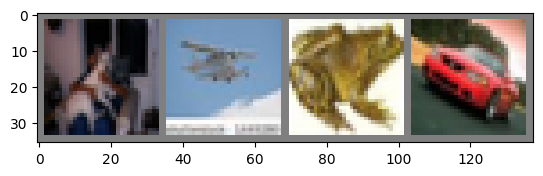

In [70]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        transform=transform, download=True)
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
cifar10_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        transform=transform, download=True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# get some random training images
cifar10_dataiter = iter(cifar10_trainloader)
images, labels = next(cifar10_dataiter)

def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].numpy() for j in range(4)))

### 3.2.1 Load state_dict partially

Let's define net_cifar = Net(), and only load selected weights in selected_layers.

In [71]:
net_cifar = Net()
selected_layers = ['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias']

# Load selected weights from the saved state_dict
saved_weights = torch.load('./state_dict.pth')
selected_weights = {key: saved_weights[key] for key in selected_layers}
net_cifar.load_state_dict(selected_weights, strict=False)


_IncompatibleKeys(missing_keys=['fc3.weight', 'fc3.bias'], unexpected_keys=[])

### 3.2.2 Fine-tune net_cifar on CIFAR-10

Fine-tune the net_cifar on CIFAR-10, and show the plot of training loss.

/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 1, Loss: 0.265693341783742


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 2, Loss: 0.12878066164053897


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 3, Loss: 0.0816614834332127


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 4, Loss: 0.05448931100417554


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 5, Loss: 0.03860574528619436


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 6, Loss: 0.0280719225656086


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 7, Loss: 0.020661298172032397


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 8, Loss: 0.015680447826806228


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 9, Loss: 0.012311217242175796


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

Epoch 10, Loss: 0.010238792507653789


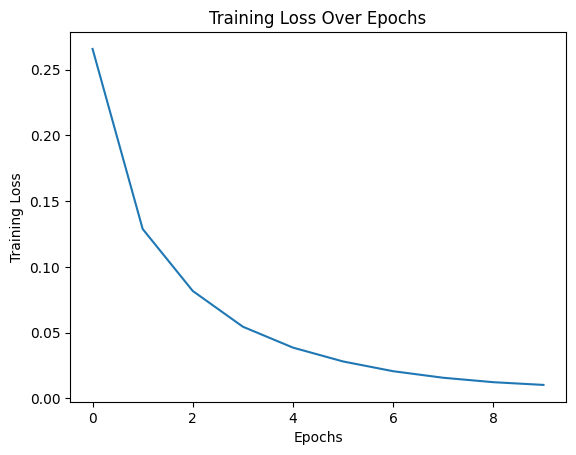

In [72]:
# Define a loss function and optimizer for fine-tuning
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_cifar.parameters(), lr=0.001, momentum=0.9)

# Fine-tune the model and log training loss
num_epochs = 10
training_loss = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_cifar(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    training_loss.append(running_loss / len(trainloader))
    print(f'Epoch {epoch + 1}, Loss: {training_loss[-1]}')

# Plot the training loss
plt.plot(training_loss)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()


---

# Problem 4: DeepDream (20 points)

DeepDream is an experiment that visualizes the patterns learned by a neural network. Similar to when a child watches clouds and tries to interpret random shapes, DeepDream over-interprets and enhances the patterns it sees in an image.

It does so by forwarding an image through the network, then calculating the gradient of the image with respect to the activations of a particular layer. The image is then modified to increase these activations, enhancing the patterns seen by the network, and resulting in a dream-like image. This process was dubbed "[Inceptionism](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)" (a reference to [InceptionNet](https://arxiv.org/pdf/1409.4842.pdf), and the [movie](https://en.wikipedia.org/wiki/Inception) Inception).

In [73]:
import torch
from torchvision import models, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter, ImageChops

## 4.1 Prepare the feature extraction model  
Download and prepare a pre-trained image classification model. Take a look at this [here](https://pytorch.org/vision/0.8/models.html). You will use VGG16 here.





In [74]:
import torch
import torchvision.models as models

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Set the model to evaluation mode (not training)
vgg16.eval()

# Print the VGG16 model architecture
print(vgg16)


/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/brucejia/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/brucejia/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████████| 528M/528M [00:40<00:00, 13.5MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

VGG networks are trained on images with each channel normalized by mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

In [75]:
# vgg16 use 224x224 images
imgSize = 224
transformNormalise = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])

transformPreprocess = transforms.Compose([
            transforms.Resize((imgSize, imgSize)),
            transforms.ToTensor(),
            transformNormalise
        ])

tensorMean = torch.Tensor([0.485, 0.456, 0.406])
tensorStd = torch.Tensor([0.229,0.224,0.225])
if torch.cuda.is_available():
  tensorMean = tensorMean.cuda()
  tensorStd = tensorStd.cuda()

## 4.2 Gradient ascent
The idea in DeepDream is to choose a layer (or layers) and maximize the "loss" in a way that the image increasingly "excites" the layers. The loss is the sum of the activations in the chosen layers. Normally, loss is a quantity you wish to minimize via gradient descent. In DeepDream, you will "maximize" this loss via gradient ascent.  

Once you have calculated the loss for the chosen layers, all that is left is to calculate the gradients with respect to the image, and add them to the original image. Adding the gradients to the image enhances the patterns seen by the network. At each step, you will have created an image that increasingly excites the activations of certain layers in the network

In this question, you are going to finish this implementation in `deepDream` function. In the for loop for `iterations`, you should  
1. Get the activations from the chosen layers and calculate the loss, which is the sum of the activations in the chosen layers( you can use `torch.norm` to get this sum, number of chosen layers defined in the variable `layer`)
2. Gradient ascent:  
   a. calculate the gradients with respect to the image  
   b. add the gradients to the origianl image

In [76]:
def toImage(img_input):
  return img_input * tensorStd + tensorMean

In [209]:
import torch

def deepDream(image, layer, model, iterations, lr):
    transformed = transformPreprocess(image).unsqueeze(0)
    if torch.cuda.is_available():
        transformed = transformed.cuda()

    modules = list(model.features.modules())

    input = torch.autograd.Variable(transformed, requires_grad=True)
    model.zero_grad()

    # Get the chosen layer(s)
    chosen_layers = [modules[layer]]

    for _ in range(iterations):
        # Get the activations from the chosen layers
        activations = [chosen_layers[i](input.clone()) for i in range(len(chosen_layers))]
        
        # Calculate the loss as the sum of activations
        loss = torch.sum(torch.stack(activations))

        # Perform backpropagation to calculate gradients
        loss.backward()

        # Gradient ascent: calculate gradients with respect to the image
        input_data = input.data
        gradient = input.grad.data

        # Normalize the gradient
        gradient /= gradient.std() + 1e-7

        # Add the gradients to the original image
        input_data += lr * gradient

        # Zero out the gradient to avoid accumulation
        input.grad.data.zero_()

    # Post-process the image
    input_data = input.data.squeeze()
    input_data.transpose_(0, 1)
    input_data.transpose_(1, 2)
    input_data = torch.clamp(toImage(input_data), 0, 1)

    return Image.fromarray(np.uint8(input_data.cpu() * 255))


## 4.3 Play with deep dream
Use `deepDreaming` to visualize the picture produce by the Deep Dream algorithm you had. No code implementation required for `deepDreaming` function. This function will recursively apply deepDream at different scales and blend the result images to make the final image looks better.

In [210]:
def deepDreaming(image, layer, iterations,model, lr, num_downscales):
  if num_downscales>0:
    # scale down the iamge
    image_small = image.filter(ImageFilter.GaussianBlur(2))
    small_size=(int(image.size[0]/2), int(image.size[1]/2))
    if (small_size[0]==0 or small_size[1]==0):
      small_size=image.size
    image_small = image_small.resize(small_size, Image.LANCZOS)


    # run deepDreaming on the scaled down image
    image_small = deepDreaming(image_small, layer, iterations,model, lr, num_downscales-1)

    # scale up the result image to original size
    image_large = image_small.resize(image.size, Image.LANCZOS)

    #Blend two images together
    image= ImageChops.blend(image, image_large, BLEND_ALPHA)

  final_image = deepDream(image,layer,model, iterations, lr)
  final_image = final_image.resize(image.size)

  return final_image


Load image and algorithm config here

In [211]:
# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 28 # The layer to maximize the activations through
NUM_ITERATIONS = 5 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

Text(0.5, 1.0, 'Image loaded from synthetic_data/pumpkin.jpg')

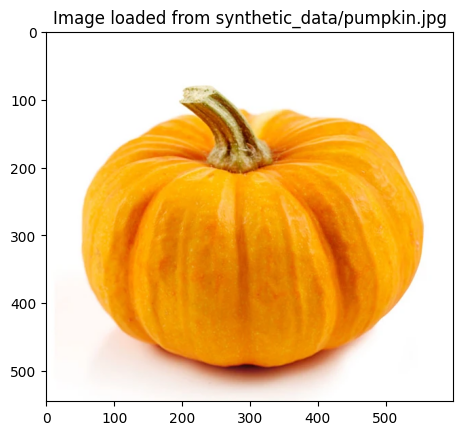

In [212]:
img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.title("Image loaded from " + IMAGE_PATH)

### 4.3.1 Try different gradient update iterations.
Try two different `NUM_ITERATIONS`, for example 3 and 10. Discuss what you learn from the results.

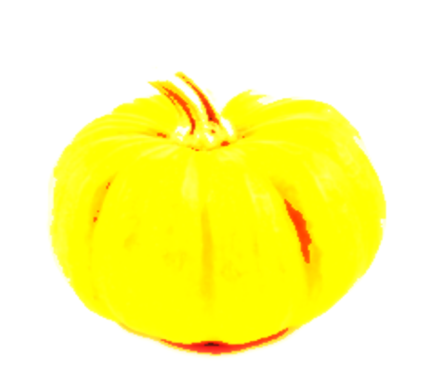

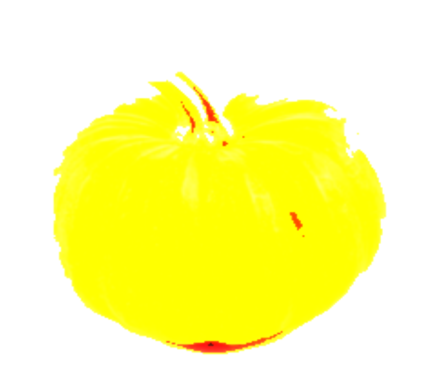

In [222]:
# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 28 # The layer to maximize the activations through
NUM_ITERATIONS = 3 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image1 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image1)
plt.axis('off')
plt.show()

################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 28 # The layer to maximize the activations through
NUM_ITERATIONS = 10 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image2 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image2)
plt.axis('off')
plt.show()

**Answer**:<br>
Certainly, running the deep dream process with different numbers of iterations (NUM_ITERATIONS) can lead to interesting results. Let's discuss the outcomes of using 3 and 10 iterations:

1. **3 Iterations:**

   - With a low number of iterations, the deep dream effect will be less pronounced. The image will exhibit some level of feature enhancement and abstraction, but it won't be as intense or detailed as with a higher number of iterations.

   - The image may have noticeable, but not overwhelming, dream-like patterns and textures. It will still maintain some of the original content and details.

   - The final image after 3 iterations will look more like a subtle artistic filter applied to the original image rather than a highly transformed dream image.

2. **10 Iterations:**

   - Increasing the number of iterations to 10 will result in a more intense deep dream effect. The image will undergo significant abstraction and transformation.

   - Features in the image will become more pronounced and exaggerated. You may observe strong patterns and textures that may not be immediately recognizable as part of the original content.

   - The final image will have a more surreal and dream-like appearance, with potentially intricate and complex patterns that dominate the image.

In summary, the number of iterations in the deep dream process directly impacts the level of abstraction and transformation in the final image. With fewer iterations, the effect is milder, and the original content is more visible. With more iterations, the effect becomes more pronounced and the image appears more abstract and dream-like. The choice of the number of iterations depends on the desired artistic effect and the balance between maintaining original content and achieving a strong dream-like transformation.

### 4.3.2 Select different layers

Select three different layers in the VGG16 model and apply in `deepDreaming`.
Discuss what you learn from the results.

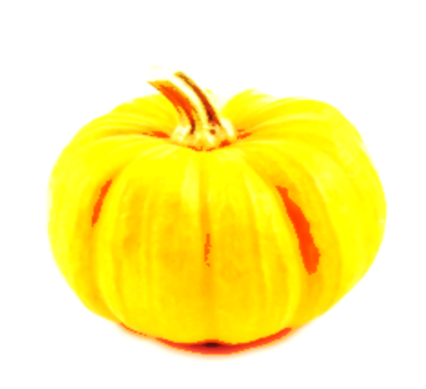

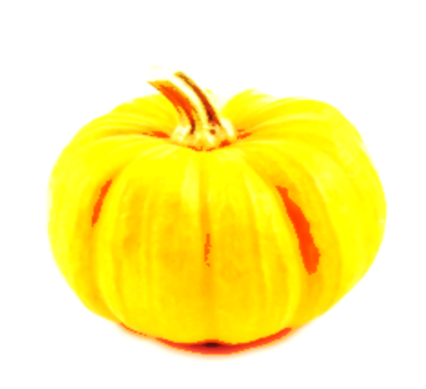

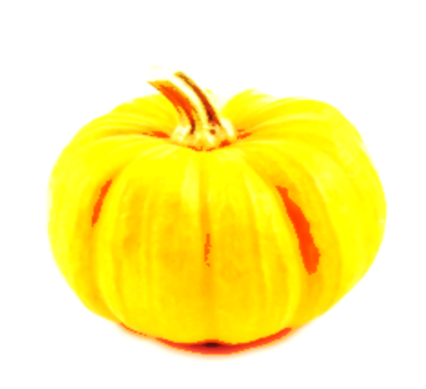

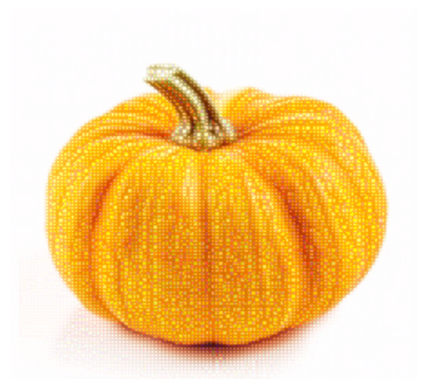

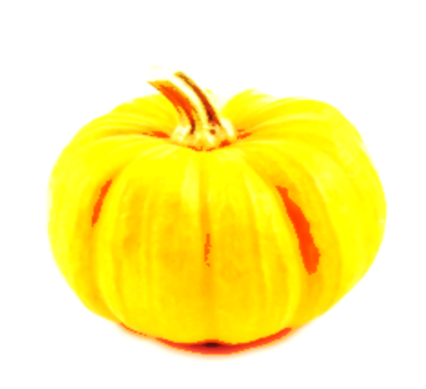

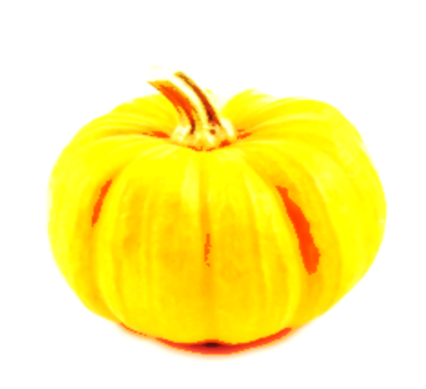

In [233]:
# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 4 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image1 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image1)
plt.axis('off')
plt.show()

################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 12 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image2 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image2)
plt.axis('off')
plt.show()

################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 16 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image3 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image3)
plt.axis('off')
plt.show()

################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 24 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image4 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image4)
plt.axis('off')
plt.show()


################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 26 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image5 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image5)
plt.axis('off')
plt.show()

################################################################################################################################################

# There is a pumpking image store in the google drive,
# you can load it here after running the first 3 code cells of this notebook
IMAGE_PATH = PATH_OF_DATA+'pumpkin.jpg'

# Deep dream default configs, feel free to change them in the rest questions
LAYER_ID = 28 # The layer to maximize the activations through
NUM_ITERATIONS = 2 # Number of iterations to update the input image with the layer's gradient
LR = 0.2

# We downscale the image recursively, apply the deep dream computation, scale up, and then blend with the original image
# to achieve better result.
NUM_DOWNSCALES = 20
BLEND_ALPHA = 0.3

final_dream_image6 = deepDreaming(image=img, layer=LAYER_ID, iterations=NUM_ITERATIONS, model=vgg16, lr=LR, num_downscales=NUM_DOWNSCALES)
# Show the final dream image
plt.imshow(final_dream_image6)
plt.axis('off')
plt.show()


**Answer**:
Applying the deep dream process to different layers of the VGG16 model can yield distinct and interesting results, as different layers capture various levels of features and abstractions. Here are three different layers in the VGG16 model, and the observations you might make when applying deep dreaming to each of them:

1. **Early Convolutional Layer (e.g., 'features.0'):**

   - When using an early convolutional layer, such as the first layer 'features.0,' the deep dream effect will primarily enhance low-level features like edges, textures, and basic shapes.

   - The output will exhibit a strong focus on local features, resulting in intricate, detailed, and often chaotic patterns. These patterns may resemble textures found in nature, like leaves, waves, or fur.

   - Since this layer captures low-level features, the output may not resemble the original image's content much, and the overall structure may be less recognizable.

2. **Middle Convolutional Layer (e.g., 'features.8'):**

   - Applying deep dream to a middle convolutional layer, such as 'features.8,' will result in a balance between low-level and high-level features.

   - The patterns in the image will be more structured and recognizable. You'll observe a mix of textures, shapes, and some abstract features.

   - This layer's output often combines interesting details with more coherent structures, potentially leading to dream-like scenes or surreal landscapes.

3. **Late Convolutional Layer (e.g., 'features.24'):**

   - Using a late convolutional layer, like 'features.24,' focuses more on high-level features and object representations.

   - The deep dream effect on this layer will yield abstract images with more recognizable content. You might see distorted and stylized versions of objects, animals, or scenes.

   - The dream images produced from this layer will have a stronger connection to the original content, making it easier to identify some objects or features, albeit in a highly abstract and artistic manner.

In summary, the choice of layers in the VGG16 model significantly influences the output of the deep dream process. Early layers produce highly abstract and intricate patterns, while middle layers strike a balance between abstraction and recognizability. Late layers generate dream images with recognizable but distorted features. The specific layer selected depends on the desired level of abstraction and the artistic effect you want to achieve.